In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [10]:
x=df.drop(columns=["Exited"])
y=df['Exited']

In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [13]:
xtrain.shape

(8000, 11)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [15]:
xtrain

array([[ 1.75585074e-01, -2.03409671e-03,  1.38733976e+00, ...,
        -5.81006857e-01,  1.74250594e+00,  8.99519948e-01],
       [ 1.35591062e+00,  8.54427676e-01,  1.38733976e+00, ...,
         1.72115008e+00, -5.73886136e-01, -1.11170408e+00],
       [-2.29895709e+00,  9.31283224e-02, -6.91850586e-01, ...,
         1.72115008e+00, -5.73886136e-01, -1.11170408e+00],
       ...,
       [-4.24931435e-01,  3.61413783e+00, -1.38491403e+00, ...,
        -5.81006857e-01, -5.73886136e-01,  8.99519948e-01],
       [ 1.70793754e+00,  1.71088945e+00,  1.21286103e-03, ...,
        -5.81006857e-01,  1.74250594e+00, -1.11170408e+00],
       [-1.58454952e+00, -6.68171031e-01,  1.04080803e+00, ...,
        -5.81006857e-01, -5.73886136e-01,  8.99519948e-01]])

In [20]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))

model.add(Dense(3,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172 (688.00 B)

 Trainable params: 172 (688.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
history=model.fit(xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7546 - loss: 0.6468 - val_accuracy: 0.7894 - val_loss: 0.5576
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 0.5204 - val_accuracy: 0.7962 - val_loss: 0.4761
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.4508 - val_accuracy: 0.8075 - val_loss: 0.4521
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 0.4174 - val_accuracy: 0.8131 - val_loss: 0.4417
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8128 - loss: 0.4232 - val_accuracy: 0.8181 - val_loss: 0.4313
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.4057 - val_accuracy: 0.8188 - val_loss: 0.4240
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8289 - loss: 0.3882 - val_accuracy: 0.8138 - val_loss: 0.4180
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8369 - loss: 0.3774 - val_accuracy: 0.

In [25]:
model.layers[0].get_weights()

[array([[-0.02866552,  0.22773536, -0.19841897,  0.06119582, -0.01966385,
          0.17569663,  0.07211917,  0.19973722,  0.06109766, -0.2609889 ,
          0.38946557],
        [-0.8762086 , -0.02428658, -0.14291558,  0.6092006 , -0.28135628,
          0.65725964, -0.08250093,  0.46484256, -0.20740049, -0.6533998 ,
          0.02843783],
        [-0.00190728,  0.30897173, -0.05284747,  0.06178791, -0.08957741,
          0.09051369,  0.01559372,  0.1118459 ,  0.2897616 , -0.21118715,
          0.03130123],
        [ 0.2247844 ,  0.1536108 ,  0.005667  ,  0.3555304 ,  0.20859504,
         -0.298119  ,  0.22170265,  0.21362132, -0.40368107, -0.7754344 ,
          0.2854122 ],
        [ 0.2846971 ,  0.08610093,  0.8396692 ,  0.5069137 ,  0.17339097,
         -0.6627261 ,  0.87585753, -0.47994465,  0.2898971 , -0.02252661,
         -0.03969008],
        [ 0.36880022, -0.16045748, -0.3320108 ,  0.09376038, -0.05830171,
         -0.37389112, -0.04387108,  0.13501203, -0.39942542, -0.3209426

In [26]:
ylog=model.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [27]:
ypred=np.where(ylog>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(ypred,ytest)

0.835

In [30]:
import matplotlib.pyplot as plt

In [31]:
history.history

{'accuracy': [0.7799999713897705,
  0.7985937595367432,
  0.8095312714576721,
  0.8109375238418579,
  0.8209375143051147,
  0.82421875,
  0.8264062404632568,
  0.828906238079071,
  0.8307812213897705,
  0.8331249952316284],
 'loss': [0.6097601056098938,
  0.49521979689598083,
  0.442804217338562,
  0.4241495132446289,
  0.4106125235557556,
  0.3997912108898163,
  0.39144179224967957,
  0.3848121166229248,
  0.3796972930431366,
  0.37569716572761536],
 'val_accuracy': [0.7893750071525574,
  0.7962499856948853,
  0.8075000047683716,
  0.8131250143051147,
  0.8181250095367432,
  0.8187500238418579,
  0.8137500286102295,
  0.8162500262260437,
  0.815625011920929,
  0.8137500286102295],
 'val_loss': [0.5575803518295288,
  0.47612276673316956,
  0.45207059383392334,
  0.4417042136192322,
  0.43134602904319763,
  0.42404404282569885,
  0.41800612211227417,
  0.4118112325668335,
  0.40794888138771057,
  0.4044948220252991]}

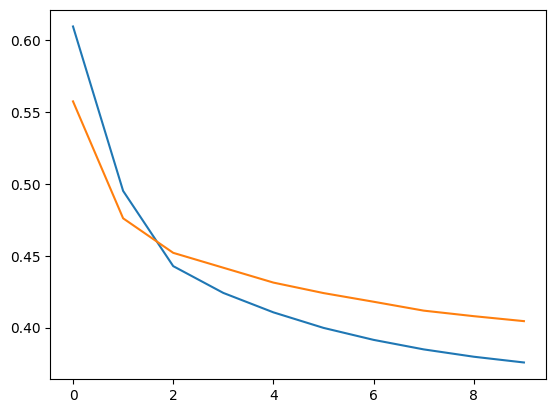

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

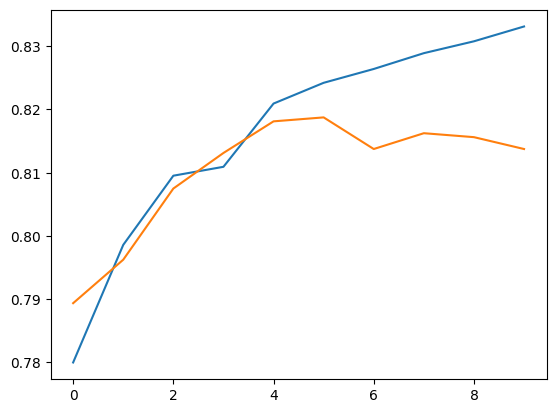

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])